In [1]:
import pandas as pd

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/K-NEarest-Neighbor/master/Classified%20Data",index_col=0)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


Set index_col=0 to use first column as index.

# Standardise the variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [16]:
scaler.fit(df.drop(["TARGET CLASS"],axis=1))#axis=1 means axis="columns"

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaler_features=scaler.transform(df.drop(["TARGET CLASS"],axis=1))

In [20]:
new=pd.DataFrame(scaler_features,columns=df.columns[:-1])
new.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Train Test Split


In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new,df["TARGET CLASS"],test_size=0.3)

# KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn=KNeighborsClassifier(n_neighbors=1)

In [101]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [102]:
knn.score(x_test,y_test)

0.9066666666666666

In [103]:
y_predicted=knn.predict(x_test)

# Evaluation and Predictions

In [104]:
from sklearn.metrics import classification_report,confusion_matrix

In [105]:
confusion_matrix(y_test,y_predicted)

array([[134,  16],
       [ 12, 138]], dtype=int64)

In [106]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       150
           1       0.90      0.92      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



## Now we can increase the performance of our model by plotting the graph between error rate and k value .And after that we will see an increase in our accuracy of model.

# Choosing a K value

Lets go ahead and use elbow method to pick a good value of k

In [107]:
import numpy as np
error_rate=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Error Rate')

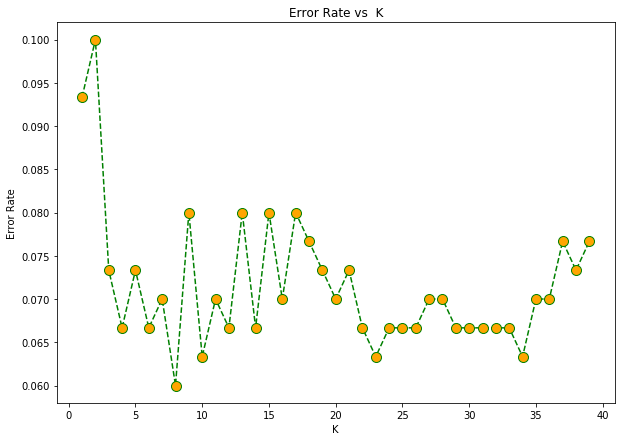

In [109]:
plt.figure(figsize=(10,7))
plt.plot(range(1,40),error_rate,marker="o",color="green",markerfacecolor="orange" ,linestyle="dashed",markersize="10")
plt.title("Error Rate vs  K")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knn=KNeighborsClassifier(n_neighbors=8)

In [130]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [131]:
pred=knn.predict(x_test)

In [132]:
from sklearn.metrics import classification_report,confusion_matrix

In [133]:
confusion_matrix(y_test,pred)

array([[140,  10],
       [  8, 142]], dtype=int64)

In [134]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       150
           1       0.93      0.95      0.94       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [135]:
knn.score(x_test,y_test)

0.94